In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, IBMQ, execute
from qiskit.circuit import Parameter
import math
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for user define modules
module_path = os.path.join('')
if not module_path in sys.path:
    sys.path.append(module_path)
    
import Swap_gate_classifier.toy_swap_test as toy

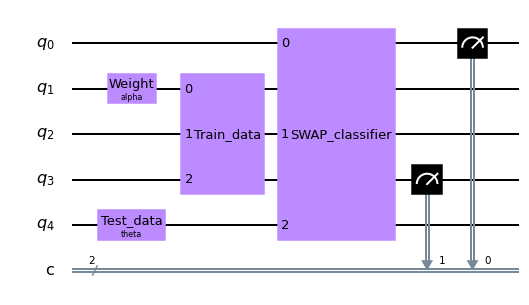

In [2]:
theta = Parameter('theta')
alpha = Parameter('alpha')

q = QuantumRegister(5, 'q')
c = ClassicalRegister(2, 'c')
a, m, x, y, t = q # adjust to backend
qc = QuantumCircuit(q, c)
qc.append(toy.weighting_gate(alpha), [m])
qc.append(toy.training_gate(), [m, x, y])
qc.append(toy.test_encoding_gate(theta), [t])
qc.append(toy.swap_classifier_gate(), [a, x, t])
qc.measure([a, y], c)
qc.draw('mpl')

In [3]:
thetas = np.linspace(0, 2*np.pi, 128)
alphas = np.linspace(0, 2*np.pi, 128)

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots = 2**10,
             parameter_binds=[{theta: tval, alpha: np.pi/2} for tval in thetas])
result = job.result().get_counts()

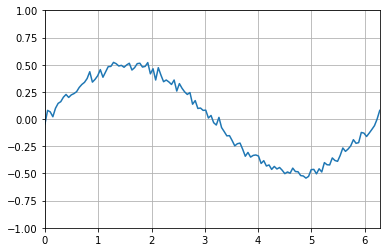

In [5]:
corr = toy.swap_test_postprocess(result)
plt.plot(thetas, corr)
plt.ylim([-1, 1])
plt.xlim([0, 2*np.pi])
plt.grid()

In [6]:
import sys
sys.path


['/Users/shaun',
 '/Users/shaun/.vscode/extensions/ms-python.python-2020.8.106424/pythonFiles/vscode_datascience_helpers/../.does-not-exist',
 '/Users/shaun/custom_pypack',
 '/',
 '/Users/shaun/.vscode/extensions/ms-python.python-2020.8.106424/pythonFiles',
 '/Users/shaun/.vscode/extensions/ms-python.python-2020.8.106424/pythonFiles/lib/python',
 '/Users/shaun/anaconda3/lib/python38.zip',
 '/Users/shaun/anaconda3/lib/python3.8',
 '/Users/shaun/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/shaun/.ipython']

In [7]:
from quantumdatabase import QDB
from quantumdatabase import initializer

initializer.initialize

<function quantumdatabase.initializer.initialize(self, params, qubits)>